# MODEL

In [2]:
# Bir şirketin yaptığı reklam harcaması neticesindeki satış oranları
# Basit doğrusal regresyonla ilgilendiğimiz için bağımsız değişkenlerden(tv, radio , np) birini seçtik

import pandas as pd

df = pd.read_csv("C:\python_py\Makine Öğrenmesi-2\Advertising.csv")
df = df.iloc[: , 1:len(df)]    # yazmadığımızda bir endeks problemi çıktı -> satır numaralarını bir değişkenmiş gibi algıladı. O yüzden yazdık
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


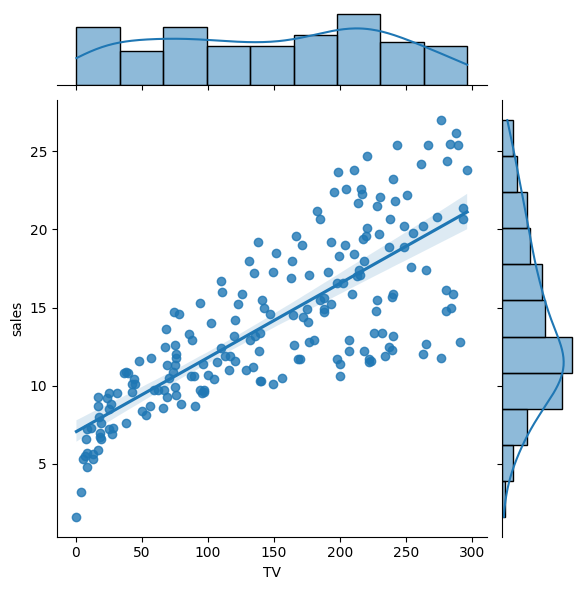

In [4]:
import seaborn as sns

sns.jointplot(x="TV" , y="sales" , data=df , kind="reg")

In [5]:
# Modelleme çalışması yapıyoruz

from sklearn.linear_model import LinearRegression

x = df[["TV"]]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [6]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [7]:
# Model nesnesi oluşturduk.

reg = LinearRegression()

In [8]:
model = reg.fit(x , y)

In [9]:
model

LinearRegression()

In [10]:
str(model)

'LinearRegression()'

In [11]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n

In [12]:
model.intercept_ # = b0

array([7.03259355])

In [13]:
model.coef_ # = b1 ; coef(coefficient) = katsayı -> b1*x + b0

array([[0.04753664]])

In [14]:
# Modelin skorunu aldık = rkare = bağımlı değişkendeki değişikliğin bağımsız değişkenlerce açıklanma yüzdesi !!!!!!!!!!

model.score(x , y)

0.611875050850071

 Kurmuş olduğumuz modelin görsel olarak nasıl bir şekle sahip olduğunu, neyi ifade ettiğini değerlendirelim. Ondan sonra bu modeli kullanarak tahmin etme işlemini gerçekleştirelim.

(0.0, 28.27)

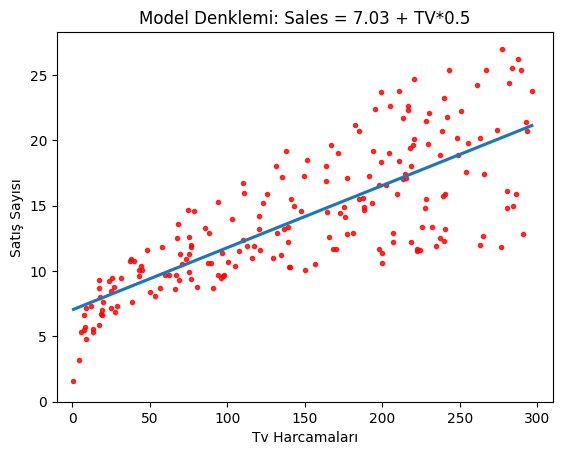

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.regplot(x="TV", y="sales", data=df, ci=None, scatter_kws={'color':'red', 's':9})  # ci(confidence interval) = güven aralığı  ; 's' (size) -> noktaların büyüklüğünü ayarlıyor
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.5")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("Tv Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0)  # y ekseninin başlangıç noktası

# Mavi doğru -> bulmuş olduğumuz model denklemi -> bir önceki derste b0(model.itercept_) ve b1(model.coef_) değerlerini bulmuştuk.
# kırmızı noktalar -> gerçek değerlerin dağılımı

# TAHMİN

Modelimizi oluşturduk. Şimdi tahmin yapalım.

In [16]:
print(7.03 + 0.05*500)     # TV harcamalarına 500 birim harcarsam satışım ne kadar olurdu? Bizim amacımız zaten mavi doğruyu yani modeli bulmaktı. Bunun için de b0 ve b1 değerlerini bulmaktı ve bu değerleri bulduk.

# Alttakiyle de aynı sonucu vermesini istersek:
print(model.intercept_ + model.coef_*500)

32.03
[[30.80091377]]


Bu tahmin işlemini daha programatik şekilde yapalım.

In [17]:
model.predict([[500]])    # İçerisinde bağımısız değişken değerini (TV harcaması) girdik. Üsttekinden farklı çıkmasının sebebei biz küsüratları yuvarlamıştık.

C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[30.80091377]])

- Birden fazla değer sonucunu tahmin etmek istersek böyle kullanırız

In [18]:
yeni_veri = [[5] , [15] , [30]]     #  İçerisinde bağımısız değişken değerlerini (TV harcaması) girdik.

model.predict(yeni_veri)

C:\Users\Bedirhan Örseloğlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# ARTIKLAR - HATALAR


Optimizasyon yaklaşımlarını anlamak için en ihtiyaç duyulan konulardan birisi

- MSE : Hata Kareler Ortalaması
- RMSE : Hata Kareler Ortalamasının Karekökü

In [22]:
y.head(10)    # veri setindeki satışlarımız yani gerçek değerlerimiz.

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [23]:
model.predict(x)[0:9]   # Üstteki verinin yani gerçek değerlerimizi bizim nasıl tahmin ettiğimiz

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866]])

- Bunu bir DataFrame şeklinde daha güzel gösterelim

In [35]:
gercek_y = y[0:10]
tahmin_edilen_y = pd.DataFrame(model.predict(x)[0:10])
hatalar = pd.concat([gercek_y , tahmin_edilen_y] , axis=1)
hatalar.columns = ["gerçek değerler" , "tahmin ettiğimiz"]
hatalar

,gerçek değerler,tahmin ettiğimiz
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [36]:
hatalar["hata değerleri"] = hatalar["gerçek değerler"] - hatalar["tahmin ettiğimiz"]
hatalar

,gerçek değerler,tahmin ettiğimiz,hata değerleri
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


- Bu hataların oranını bulmak istersek MSE ile birlikte bunu bulabiliriz

In [37]:
hatalar["MSE Hata Oranları"] = hatalar["hata değerleri"]**2
hatalar

,gerçek değerler,tahmin ettiğimiz,hata değerleri,MSE Hata Oranları
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [40]:
import numpy as np

np.mean(hatalar["MSE Hata Oranları"])   # Hata Kareler Ortalamasını (MSE) hesaplamış olduk. Yani ortalama hatamızı bulduk.

9.290350329638102